### Imports and graphing function

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import torch

# Chart Function
def plot_results(file_paths, labels):
    """
    Plots various metrics from machine learning training runs.

    Parameters:
    - file_paths: List of strings representing the file paths to CSV files.
    - labels: List of strings representing the labels for each dataset.
    """

    # Read DataFrames
    dataframes = [pd.read_csv(fp) for fp in file_paths]
    num_datasets = len(dataframes)

    # Extract data
    epochs_list = [df['Epoch'] for df in dataframes]
    test_accuracy_list = [df['Test Accuracy'] for df in dataframes]
    test_error_list = [df['Test Error'] for df in dataframes]
    training_loss_list = [df['Training Loss'] for df in dataframes]
    test_loss_list = [df['Test Loss'] for df in dataframes]
    x_k_list = [df['x_k Comparison'] if 'x_k Comparison' in df.columns else pd.Series([0] * len(df)) for df in dataframes]
    x_ag_k_list = [df['x_ag_k Comparison'] if 'x_ag_k Comparison' in df.columns else pd.Series([0] * len(df)) for df in dataframes]

    # Square the gradient norms
    training_grad_norm_squared_list = [df['Training Gradient Norm']**2 for df in dataframes]
    test_grad_norm_squared_list = [df['Test Gradient Norm']**2 for df in dataframes]
    total_training_time_list = [df['Training Time (s)'].cumsum() for df in dataframes]

    # Check if Epochs are the same across datasets
    epoch_lengths = [len(e) for e in epochs_list]
    max_epochs = max(epoch_lengths)
    if len(set(epoch_lengths)) > 1:
        print(f"Warning: Epochs in dataset(s) differ from the longest dataset.")

    # Set up colors using a colormap
    cmap_name = 'tab10' if num_datasets <= 10 else 'tab20'
    cmap = plt.get_cmap(cmap_name)
    colors = [cmap(i % cmap.N) for i in range(num_datasets)]

    # Create subplots with 7 rows and 2 columns
    fig, axes = plt.subplots(7, 2, figsize=(20, 38))

    # Row 1: Test Accuracy over Epochs and Training Time
    # Plot 1: Test Accuracy over Epochs (left plot)
    for i in range(num_datasets):
        axes[0, 0].plot(epochs_list[i], test_accuracy_list[i], label=labels[i], color=colors[i])
    axes[0, 0].axhline(y=0.68, color='gray', linestyle='--', linewidth=1)
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Test Accuracy')
    axes[0, 0].set_title(f'Test Accuracy over {max_epochs} Epochs')
    axes[0, 0].legend()

    # Plot 2: Test Accuracy vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[0, 1].plot(total_training_time_list[i], test_accuracy_list[i], label=labels[i], color=colors[i])
    axes[0, 1].axhline(y=0.68, color='gray', linestyle='--', linewidth=1)
    axes[0, 1].set_xlabel('Training Time (s)')
    axes[0, 1].set_ylabel('Test Accuracy')
    axes[0, 1].set_title('Test Accuracy vs Total Training Time')
    axes[0, 1].legend()

    # Row 2: Training Loss over Epochs and Test Loss over Epochs
    # Plot 3: Training Loss over Epochs (left plot)
    for i in range(num_datasets):
        axes[1, 0].plot(epochs_list[i], training_loss_list[i], label=labels[i], color=colors[i])
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Training Loss')
    axes[1, 0].set_title(f'Training Loss over {max_epochs} Epochs')
    axes[1, 0].legend()

    # Plot 4: Test Loss over Epochs (right plot)
    for i in range(num_datasets):
        axes[1, 1].plot(epochs_list[i], test_loss_list[i], label=labels[i], color=colors[i])
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Test Loss')
    axes[1, 1].set_title(f'Test Loss over {max_epochs} Epochs')
    axes[1, 1].legend()

    # Row 3: Training Gradient Norm Squared over Epochs and Test Gradient Norm Squared over Epochs
    # Plot 5: Training Gradient Norm Squared over Epochs (left plot)
    for i in range(num_datasets):
        axes[2, 0].plot(epochs_list[i], training_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[2, 0].set_xlabel('Epoch')
    axes[2, 0].set_ylabel('Gradient Norm Squared')
    axes[2, 0].set_title(f'Training Gradient Norm Squared over {max_epochs} Epochs')
    axes[2, 0].legend()

    # Plot 6: Test Gradient Norm Squared over Epochs (right plot)
    for i in range(num_datasets):
        axes[2, 1].plot(epochs_list[i], test_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[2, 1].set_xlabel('Epoch')
    axes[2, 1].set_ylabel('Gradient Norm Squared')
    axes[2, 1].set_title(f'Test Gradient Norm Squared over {max_epochs} Epochs')
    axes[2, 1].legend()

    # Row 4: Training Loss vs Total Training Time and Test Loss vs Total Training Time
    # Plot 7: Training Loss vs Total Training Time (left plot)
    for i in range(num_datasets):
        axes[3, 0].plot(total_training_time_list[i], training_loss_list[i], label=labels[i], color=colors[i])
    axes[3, 0].set_xlabel('Training Time (s)')
    axes[3, 0].set_ylabel('Training Loss')
    axes[3, 0].set_title('Training Loss vs Total Training Time')
    axes[3, 0].legend()

    # Plot 8: Test Loss vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[3, 1].plot(total_training_time_list[i], test_loss_list[i], label=labels[i], color=colors[i])
    axes[3, 1].set_xlabel('Training Time (s)')
    axes[3, 1].set_ylabel('Test Loss')
    axes[3, 1].set_title('Test Loss vs Total Training Time')
    axes[3, 1].legend()

    # Row 5: Training Gradient Norm Squared vs Total Training Time and Test Gradient Norm Squared vs Total Training Time
    # Plot 9: Training Gradient Norm Squared vs Total Training Time (left plot)
    for i in range(num_datasets):
        axes[4, 0].plot(total_training_time_list[i], training_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[4, 0].set_xlabel('Training Time (s)')
    axes[4, 0].set_ylabel('Gradient Norm Squared')
    axes[4, 0].set_title('Training Gradient Norm Squared vs Total Training Time')
    axes[4, 0].legend()

    # Plot 10: Test Gradient Norm Squared vs Total Training Time (right plot)
    for i in range(num_datasets):
        axes[4, 1].plot(total_training_time_list[i], test_grad_norm_squared_list[i], label=labels[i], color=colors[i])
    axes[4, 1].set_xlabel('Training Time (s)')
    axes[4, 1].set_ylabel('Gradient Norm Squared')
    axes[4, 1].set_title('Test Gradient Norm Squared vs Total Training Time')
    axes[4, 1].legend()

    # Row 6: Test Error Rate over Epochs and Training Time
    # Plot 11: Test Error Rate vs Epoch (left plot)
    for i in range(num_datasets):
        axes[5, 0].plot(epochs_list[i], test_error_list[i], label=labels[i], color=colors[i])
    axes[5, 0].set_xlabel('Epoch')
    axes[5, 0].set_ylabel('Test Error')
    axes[5, 0].set_title(f'Test Error over {max_epochs} Epochs')
    axes[5, 0].legend()

    # Plot 12: Test Error Rate vs Training Time (right plot)
    for i in range(num_datasets):
        axes[5, 1].plot(total_training_time_list[i], test_error_list[i], label=labels[i], color=colors[i])
    axes[5, 1].set_xlabel('Training Time (s)')
    axes[5, 1].set_ylabel('Test Error')
    axes[5, 1].set_title('Test Error vs Total Training Time')
    axes[5, 1].legend()

    # Row 7: x_bar and x_k comparisons
    # Plot 11: x_bar vs x_k vs Epoch (left plot)
    for i in range(num_datasets):
        axes[6, 0].plot(epochs_list[i], x_k_list[i], label=labels[i], color=colors[i])
    axes[6, 0].set_xlabel('Epoch')
    axes[6, 0].set_ylabel('||x_bar - x_k||')
    axes[6, 0].set_title(f'||x_bar - x_k|| over {max_epochs} Epochs')
    axes[6, 0].legend()

    # Plot 12: x_bar vs x_ag_k vs Epoch (right plot)
    for i in range(num_datasets):
        axes[6, 1].plot(epochs_list[i], x_ag_k_list[i], label=labels[i], color=colors[i])
    axes[6, 1].set_xlabel('Epoch')
    axes[6, 1].set_ylabel('||x_bar - x_ag_k||')
    axes[6, 1].set_title(f'||x_bar - x_ag_k|| over {max_epochs} Epochs')
    axes[6, 1].legend()

    # Adjust the layout
    plt.tight_layout()

    # Show the plot
    plt.show()

### AR Analysis

In [ ]:
one = "generated/hinge/n_2000_m_1000/AR/no-lr/100/1000/2024-12-03-14:12:55/results.csv"
two = "generated/hinge/n_2000_m_1000/AR/no-lr/100/1000/2024-12-03-14:13:46/results.csv"

files = [one, two]
labels = ["one", "two"]

plot_results(files, labels)


In [ ]:
# diverging runs

e1500 = "generated/hinge/n_2000_m_1000/AR/no-lr/1493/2024-12-04-09:49:16/results.csv"
e6000 = "generated/hinge/n_2000_m_1000/AR/no-lr/5897/1000/2024-12-04-10:01:06/results.csv"

files = [e1500, e6000]
labels = ["AR w/ AG, 1500 iterations", "AR w/ AG, 6000 iterations"]

plot_results(files, labels)

In [ ]:
# converging runs

e110 = "generated/hinge/n_2000_m_1000/AR/no-lr/110/1000/2024-12-04-09:53:04/results.csv"
e110_2 = "generated/hinge/n_2000_m_1000/AR/no-lr/110/1000/2024-12-04-09:57:01/results.csv"
e136 = "generated/hinge/n_2000_m_1000/AR/no-lr/136/1000/2024-12-04-09:57:49/results.csv"

files = [e110, e110_2, e136]
labels = ["AR w/ AG, 110 iterations", "AR w/ AG, 110 iterations (2)", "AR w/ AG, 136 iterations"]

plot_results(files, labels)

In [ ]:
# comparing AR-AG-pf runs
s5 = ""
s10 = ""
s15 = ""
s20 = "generated/hinge/n_2000_m_1000/AR-AG-pf/no-lr/sigma_ratio_20.0/252/2024-12-13-12:16:30/results.csv"
s50 = "generated/hinge/n_2000_m_1000/AR-AG-pf/no-lr/sigma_ratio_50.0/403/2024-12-13-12:17:21/results.csv"

files = [s5, s10, s15, s20, s50]
labels = ["AR w/ AG_pf, sigma ratio 5", "AR w/ AG_pf, sigma ratio 10", "AR w/ AG_pf, sigma ratio 15", "AR w/ AG_pf, sigma ratio 20", "AR w/ AG_pf, sigma ratio 50"]

plot_results(files, labels)

### Best Run Comparison

In [ ]:
ar_ag_new = "generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_5.0/119/2024-12-17-10:13:38/results.csv"
ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-12-17-10:17:33/results.csv"

files = [ar_ag_new, ag]
labels = ["AR w/ AG, new", "AG w/ 200 iterations"]

plot_results(files, labels)

In [ ]:
# Best AR vs. AG vs. AG_pf

ar = "generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_10.0/136/1000/2024-12-04-09:57:49/results.csv"
ag = "generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-11-06-16:28:14/results.csv"
ag_pf = "generated/hinge/n_2000_m_1000/AG_pf/lr-0.01/200/no_batching/no_wd/2024-12-12-14:10:12/results.csv"
# ag_pf_tuned = "generated/hinge/n_2000_m_1000/AG_pf/lr-0.01/200/no_batching/no_wd/2024-12-16-13:57:21/results.csv"
ag_pf_tuned = "generated/hinge/n_2000_m_1000/AG_pf/lr-0.01/200/no_batching/no_wd/2024-12-16-13:41:04/results.csv"

files = [ar, ag, ag_pf, ag_pf_tuned]
labels = ["AR w/ AG, 136 iterations", "AG w/ 200 iterations", "Param-free AG w/ 200 iterations", "Param-free AG tuned w/ 200 iterations"]

plot_results(files, labels)

#### AR vs AG Through 30 epochs

In [5]:
ar_df = pd.read_csv("generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_10.0/136/1000/2024-12-04-09:57:49/results.csv")
ag_df = pd.read_csv("generated/hinge/n_2000_m_1000/AG/lr-0.01/200/no_batching/no_wd/2024-11-06-16:28:14/results.csv")
ag_pf_df = pd.read_csv("generated/hinge/n_2000_m_1000/AG_pf/lr-0.01/200/no_batching/no_wd/2024-12-12-14:10:12/results.csv")
ag_pf_tuned_df = pd.read_csv("generated/hinge/n_2000_m_1000/AG_pf/lr-0.01/200/no_batching/no_wd/2024-12-16-13:41:04/results.csv")

In [27]:
ar_df.head()

,Subproblem,Iteration,Epoch,Training Loss,Training Gradient Norm,Training Time (s),Test Loss,Test Gradient Norm,Test Accuracy,Test Error,x_k Comparison,x_ag_k Comparison
0,1,1,1,1.019294,0.422298,0.082850,1.003211,0.250641,0.5093,0.4907,1.142885,1.124351
1,1,2,2,0.994098,0.393303,0.013710,0.994143,0.237511,0.5278,0.4722,1.108680,1.103336
2,1,3,3,0.964283,0.364193,0.010204,0.982883,0.230585,0.5559,0.4441,1.070114,1.079440
3,1,4,4,0.931811,0.333729,0.010168,0.970091,0.227097,0.5800,0.4200,1.039333,1.056504
4,1,5,5,0.898696,0.300849,0.009606,0.956520,0.224642,0.6034,0.3966,1.028272,1.038446


In [28]:
ag_df.head()

,Epoch,Training Loss,Total Training Loss,Training Gradient Norm,Training Time (s),Test Loss,Test Gradient Norm,Test Accuracy,Test Error,x_k Comparison,x_ag_k Comparison
0,1,0.984066,1.004354,0.402547,0.048453,0.997442,0.240259,0.5233,0.4767,1.130374,1.111550
1,2,0.945805,0.977416,0.389094,0.011979,0.988030,0.232380,0.5474,0.4526,1.094942,1.089717
2,3,0.892166,0.942607,0.373036,0.010374,0.975378,0.227727,0.5738,0.4262,1.056473,1.065403
3,4,0.826146,0.900864,0.353593,0.013964,0.960118,0.224529,0.6006,0.3994,1.032765,1.043979
4,5,0.751317,0.853342,0.330632,0.010234,0.943076,0.221540,0.6204,0.3796,1.045547,1.032014


In [20]:
ag_pf_df.head()

,Epoch,Training Loss,Total Training Loss,Training Gradient Norm,Training Time (s),Test Loss,Test Gradient Norm,Test Accuracy,Test Error,x_k Comparison,x_ag_k Comparison
0,1,0.858524,0.858524,0.414394,0.044052,0.980267,0.289406,0.5441,0.4559,1.075862,0.0
1,2,0.740850,0.747984,0.714629,0.015619,1.013239,0.682824,0.5071,0.4929,1.181559,0.0
2,3,0.709236,0.657788,0.975365,0.018614,1.062698,0.920178,0.5303,0.4697,1.452568,0.0
3,4,0.504018,0.579739,0.675901,0.017562,0.962866,0.678113,0.5761,0.4239,1.757685,0.0
4,5,0.389733,0.503051,0.573085,0.020681,0.920219,0.570291,0.6093,0.3907,2.172332,0.0


In [6]:
ag_pf_tuned_30 = ag_pf_tuned_df.iloc[:30]
ag_pf_tuned_30.describe()

,Epoch,Training Loss,Total Training Loss,Training Gradient Norm,Training Time (s),Test Loss,Test Gradient Norm,Test Accuracy,Test Error,x_k Comparison,x_ag_k Comparison
count,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0
mean,15.500000,0.133763,1.781985e-01,0.111436,0.032088,0.986952,0.282665,0.664010,0.335990,5.685923,0.0
std,8.803408,0.239115,2.709855e-01,0.166769,0.027901,0.075005,0.104501,0.030828,0.030828,2.497342,0.0
min,1.000000,0.000004,2.913549e-10,0.000804,0.012652,0.854280,0.206271,0.560500,0.318800,1.031401,0.0
25%,8.250000,0.000004,2.644027e-08,0.000809,0.018919,0.926109,0.239743,0.663650,0.319500,3.685270,0.0
50%,15.500000,0.000327,1.008438e-02,0.010733,0.026317,1.021155,0.239953,0.678100,0.321900,7.234225,0.0
75%,22.750000,0.189863,2.860890e-01,0.193605,0.033712,1.049104,0.269512,0.680500,0.336350,7.616317,0.0
max,30.000000,0.861035,8.610345e-01,0.546146,0.162929,1.057078,0.715372,0.681200,0.439500,7.616336,0.0


In [7]:
ag_pf_tuned_30.to_csv("generated/hinge/n_2000_m_1000/cutoff30/ar_pf_tuned.csv", index=False)

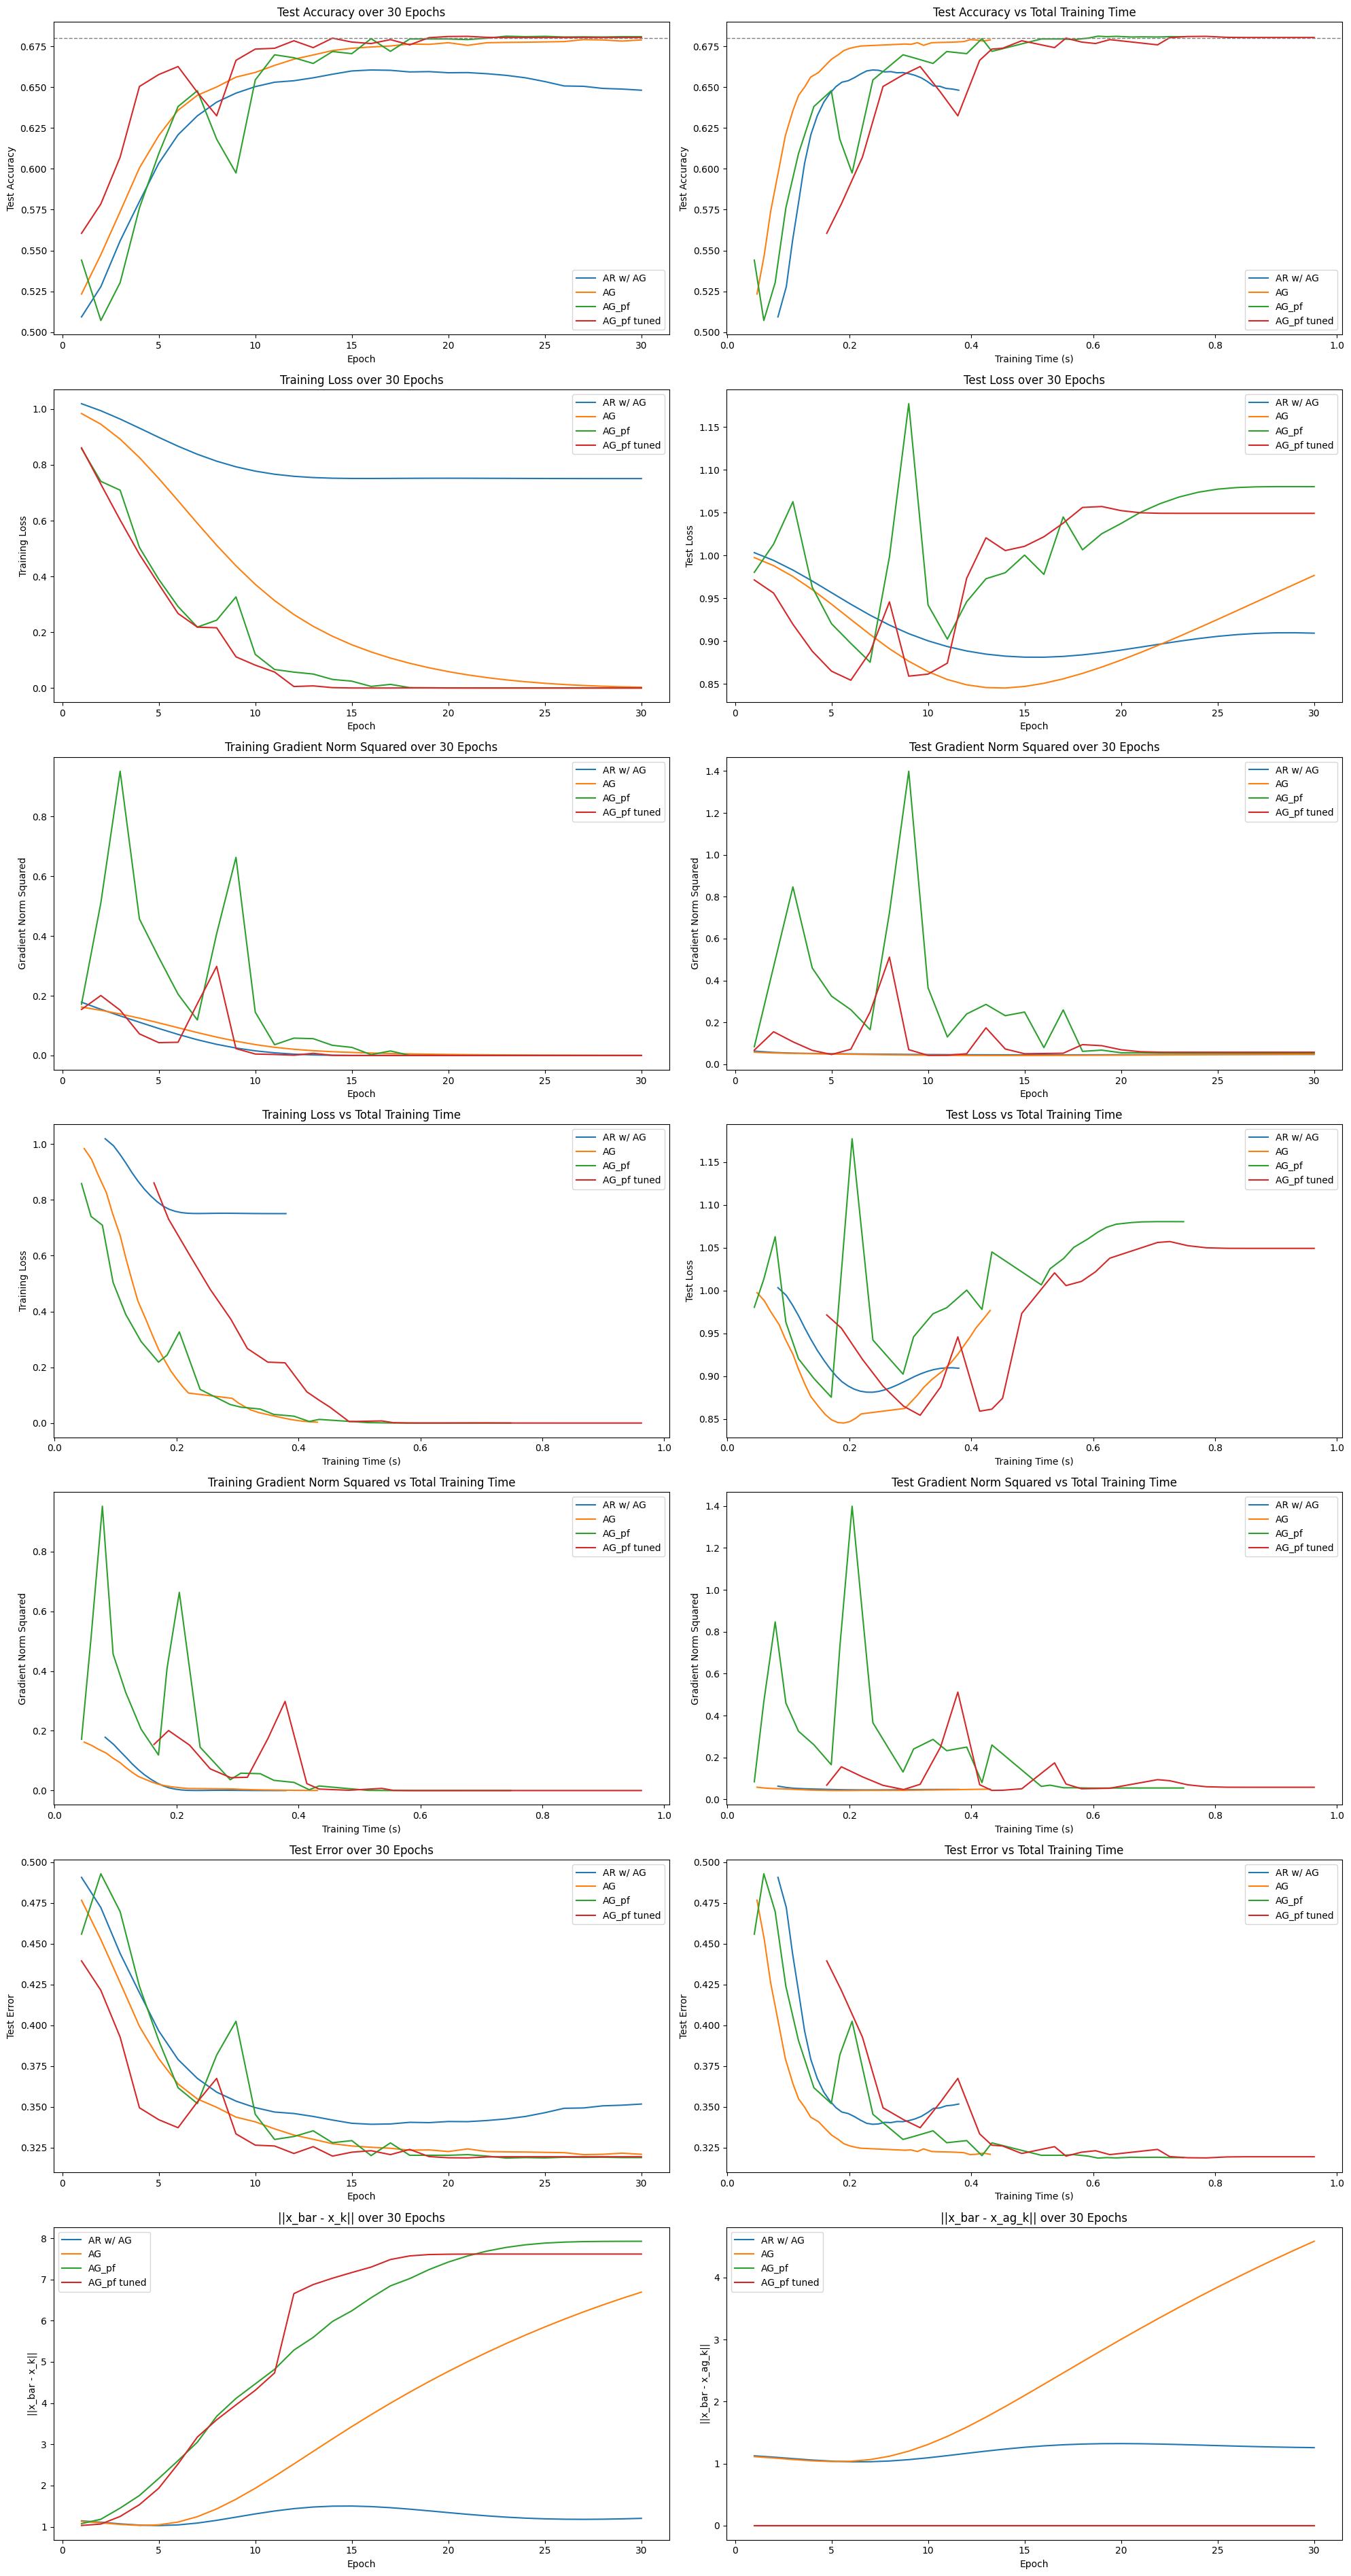

In [8]:
# Best AR vs. AG through 30 epochs

ar = "generated/hinge/n_2000_m_1000/cutoff30/ar.csv"
ag = "generated/hinge/n_2000_m_1000/cutoff30/ag.csv"
ag_pf = "generated/hinge/n_2000_m_1000/cutoff30/ar_pf.csv"
ag_pf_tuned = "generated/hinge/n_2000_m_1000/cutoff30/ar_pf_tuned.csv"

files = [ar, ag, ag_pf, ag_pf_tuned]
labels = ["AR w/ AG", "AG", "AG_pf", "AG_pf tuned"]

plot_results(files, labels)

#### Data Comparison

In [22]:
merged_df = pd.merge(
    ar_df,
    ag_df,
    on="Epoch",
    suffixes=("_AR", "_AG")
)

ag_pf_df = ag_pf_df.rename(
    columns={col: f"{col}_AG_pf" for col in ag_pf_df.columns if col != "Epoch"}
)

# Perform the second merge
merged_df = pd.merge(
    merged_df,
    ag_pf_df,
    on="Epoch"
)

merged_df.head()

,Subproblem,Iteration,Epoch,Training Loss_AR,Training Gradient Norm_AR,Training Time (s)_AR,Test Loss_AR,Test Gradient Norm_AR,Test Accuracy_AR,Test Error_AR,...,Training Loss_AG_pf,Total Training Loss_AG_pf,Training Gradient Norm_AG_pf,Training Time (s)_AG_pf,Test Loss_AG_pf,Test Gradient Norm_AG_pf,Test Accuracy_AG_pf,Test Error_AG_pf,x_k Comparison_AG_pf,x_ag_k Comparison_AG_pf
0,1,1,1,1.019294,0.422298,0.082850,1.003211,0.250641,0.5093,0.4907,...,0.858524,0.858524,0.414394,0.044052,0.980267,0.289406,0.5441,0.4559,1.075862,0.0
1,1,2,2,0.994098,0.393303,0.013710,0.994143,0.237511,0.5278,0.4722,...,0.740850,0.747984,0.714629,0.015619,1.013239,0.682824,0.5071,0.4929,1.181559,0.0
2,1,3,3,0.964283,0.364193,0.010204,0.982883,0.230585,0.5559,0.4441,...,0.709236,0.657788,0.975365,0.018614,1.062698,0.920178,0.5303,0.4697,1.452568,0.0
3,1,4,4,0.931811,0.333729,0.010168,0.970091,0.227097,0.5800,0.4200,...,0.504018,0.579739,0.675901,0.017562,0.962866,0.678113,0.5761,0.4239,1.757685,0.0
4,1,5,5,0.898696,0.300849,0.009606,0.956520,0.224642,0.6034,0.3966,...,0.389733,0.503051,0.573085,0.020681,0.920219,0.570291,0.6093,0.3907,2.172332,0.0


In [23]:
print(merged_df.columns.tolist())

['Subproblem', 'Iteration', 'Epoch', 'Training Loss_AR', 'Training Gradient Norm_AR', 'Training Time (s)_AR', 'Test Loss_AR', 'Test Gradient Norm_AR', 'Test Accuracy_AR', 'Test Error_AR', 'x_k Comparison_AR', 'x_ag_k Comparison_AR', 'Training Loss_AG', 'Total Training Loss', 'Training Gradient Norm_AG', 'Training Time (s)_AG', 'Test Loss_AG', 'Test Gradient Norm_AG', 'Test Accuracy_AG', 'Test Error_AG', 'x_k Comparison_AG', 'x_ag_k Comparison_AG', 'Training Loss_AG_pf', 'Total Training Loss_AG_pf', 'Training Gradient Norm_AG_pf', 'Training Time (s)_AG_pf', 'Test Loss_AG_pf', 'Test Gradient Norm_AG_pf', 'Test Accuracy_AG_pf', 'Test Error_AG_pf', 'x_k Comparison_AG_pf', 'x_ag_k Comparison_AG_pf']


In [ ]:
cols = [
    "Epoch",
    "Test Accuracy_AR",
    "Test Accuracy_AG",
    "Test Accuracy_AG_pf",
    "Training Gradient Norm_AR",
    "Training Gradient Norm_AG",
    "Training Gradient Norm_AG_pf",
    "Training Loss_AR",
    "Training Loss_AG",
    "Training Loss_AG_pf",
    "Test Gradient Norm_AR",
    "Test Gradient Norm_AG",
    "Test Gradient Norm_AG_pf",
    "Test Loss_AR",
    "Test Loss_AG",
    "Test Loss_AG_pf"
]

merged_clean = merged_df[cols]
merged_clean.head(50)

In [14]:
merged_AG_pf = pd.merge(
    ag_pf_df,
    ag_pf_tuned_df,
    on="Epoch",
    suffixes=("_AG_pf", "_AG_pf_tuned")
)
merged_AG_pf.head()

,Epoch,Training Loss_AG_pf,Total Training Loss_AG_pf,Training Gradient Norm_AG_pf,Training Time (s)_AG_pf,Test Loss_AG_pf,Test Gradient Norm_AG_pf,Test Accuracy_AG_pf,Test Error_AG_pf,x_k Comparison_AG_pf,...,Training Loss_AG_pf_tuned,Total Training Loss_AG_pf_tuned,Training Gradient Norm_AG_pf_tuned,Training Time (s)_AG_pf_tuned,Test Loss_AG_pf_tuned,Test Gradient Norm_AG_pf_tuned,Test Accuracy_AG_pf_tuned,Test Error_AG_pf_tuned,x_k Comparison_AG_pf_tuned,x_ag_k Comparison_AG_pf_tuned
0,1,0.858524,0.858524,0.414394,0.044052,0.980267,0.289406,0.5441,0.4559,1.075862,...,0.861035,0.861035,0.392678,0.162929,0.971339,0.259806,0.5605,0.4395,1.031401,0.0
1,2,0.740850,0.747984,0.714629,0.015619,1.013239,0.682824,0.5071,0.4929,1.181559,...,0.731073,0.777302,0.448079,0.023946,0.956014,0.394061,0.5785,0.4215,1.064661,0.0
2,3,0.709236,0.657788,0.975365,0.018614,1.062698,0.920178,0.5303,0.4697,1.452568,...,0.602363,0.701792,0.389528,0.034593,0.919557,0.327609,0.6072,0.3928,1.249902,0.0
3,4,0.504018,0.579739,0.675901,0.017562,0.962866,0.678113,0.5761,0.4239,1.757685,...,0.479023,0.626966,0.269129,0.033805,0.888234,0.258111,0.6505,0.3495,1.535644,0.0
4,5,0.389733,0.503051,0.573085,0.020681,0.920219,0.570291,0.6093,0.3907,2.172332,...,0.372197,0.546254,0.207477,0.033766,0.864818,0.216049,0.6578,0.3422,1.934832,0.0


In [15]:
cols = [
    "Epoch",
    "Test Accuracy_AG_pf",
    "Test Accuracy_AG_pf_tuned",
    "Training Gradient Norm_AG_pf",
    "Training Gradient Norm_AG_pf_tuned",
    "Training Loss_AG_pf",
    "Training Loss_AG_pf_tuned",
    "Test Gradient Norm_AG_pf",
    "Test Gradient Norm_AG_pf_tuned",
    "Test Loss_AG_pf",
    "Test Loss_AG_pf_tuned"
]

merged_AG_pf_clean = merged_AG_pf[cols]
merged_AG_pf_clean.head(40)

,Epoch,Test Accuracy_AG_pf,Test Accuracy_AG_pf_tuned,Training Gradient Norm_AG_pf,Training Gradient Norm_AG_pf_tuned,Training Loss_AG_pf,Training Loss_AG_pf_tuned,Test Gradient Norm_AG_pf,Test Gradient Norm_AG_pf_tuned,Test Loss_AG_pf,Test Loss_AG_pf_tuned
0,1,0.5441,0.5605,0.414394,0.392678,8.585238e-01,0.861035,0.289406,0.259806,0.980267,0.971339
1,2,0.5071,0.5785,0.714629,0.448079,7.408500e-01,0.731073,0.682824,0.394061,1.013239,0.956014
2,3,0.5303,0.6072,0.975365,0.389528,7.092359e-01,0.602363,0.920178,0.327609,1.062698,0.919557
3,4,0.5761,0.6505,0.675901,0.269129,5.040178e-01,0.479023,0.678113,0.258111,0.962866,0.888234
4,5,0.6093,0.6578,0.573085,0.207477,3.897327e-01,0.372197,0.570291,0.216049,0.920219,0.864818
5,6,0.6382,0.6627,0.453093,0.210664,2.921141e-01,0.267147,0.510337,0.267864,0.897287,0.854280
6,7,0.6479,0.6469,0.344908,0.416570,2.183895e-01,0.218327,0.406318,0.500260,0.875327,0.887304
7,8,0.6182,0.6325,0.638676,0.546146,2.431387e-01,0.215904,0.850462,0.715372,0.998412,0.945764
8,9,0.5975,0.6665,0.814278,0.151990,3.266322e-01,0.111739,1.182893,0.264097,1.177094,0.859031
9,10,0.6545,0.6734,0.380785,0.070754,1.204900e-01,0.081919,0.604510,0.206271,0.942119,0.861406


#### Comparison at sigma_1 = {L_approx / 10, L_approx / 15, L_approx / 5}

**For sigma_1 = L / 10.0: 30% convergence**
<br>

3/10 converged (iterations = 110, 100, 136)

<br>
<br>

**For sigma_1 = L / 15.0: 40% convergence**
<br>

Converged: 

158-3 (2.3e-7), 197-4 (9e-7), 162-3 (2.8e-7), 129-2 (1e-6)
<br>
<br>

Diverged: sub3, sub4, sub3, 1295-12 (norm=0.06), sub5, sub3

<br>
<br>

**For sigma_1 = L / 5.0: 50% convergence**
<br>
<br>

Converged:

84-2 (1.61e-7), 84-2 (1.49e-7), 110-3 (5e-7), 139-4 (2e-6), 84-2 (1.54e-7)
<br>
<br>

Diverged:

1092-15 (7.7), sub5, sub4, sub3, 2200-12 (0.1)


In [ ]:
# comparing graphs

r10 = "generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_10.0/136/1000/2024-12-04-09:57:49/results.csv"
r15 = "generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_15.0/158/2024-12-04-11:05:18/results.csv"
r5 = "generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_5.0/85/2024-12-04-11:14:56/results.csv"

files = [r10, r15, r5]
labels = ["AR w/ AG, ratio = 10", "AR w/ AG, ratio = 15", "AR w/ AG, ratio = 5"]

plot_results(files, labels)

### Updated AR grad norm calculation

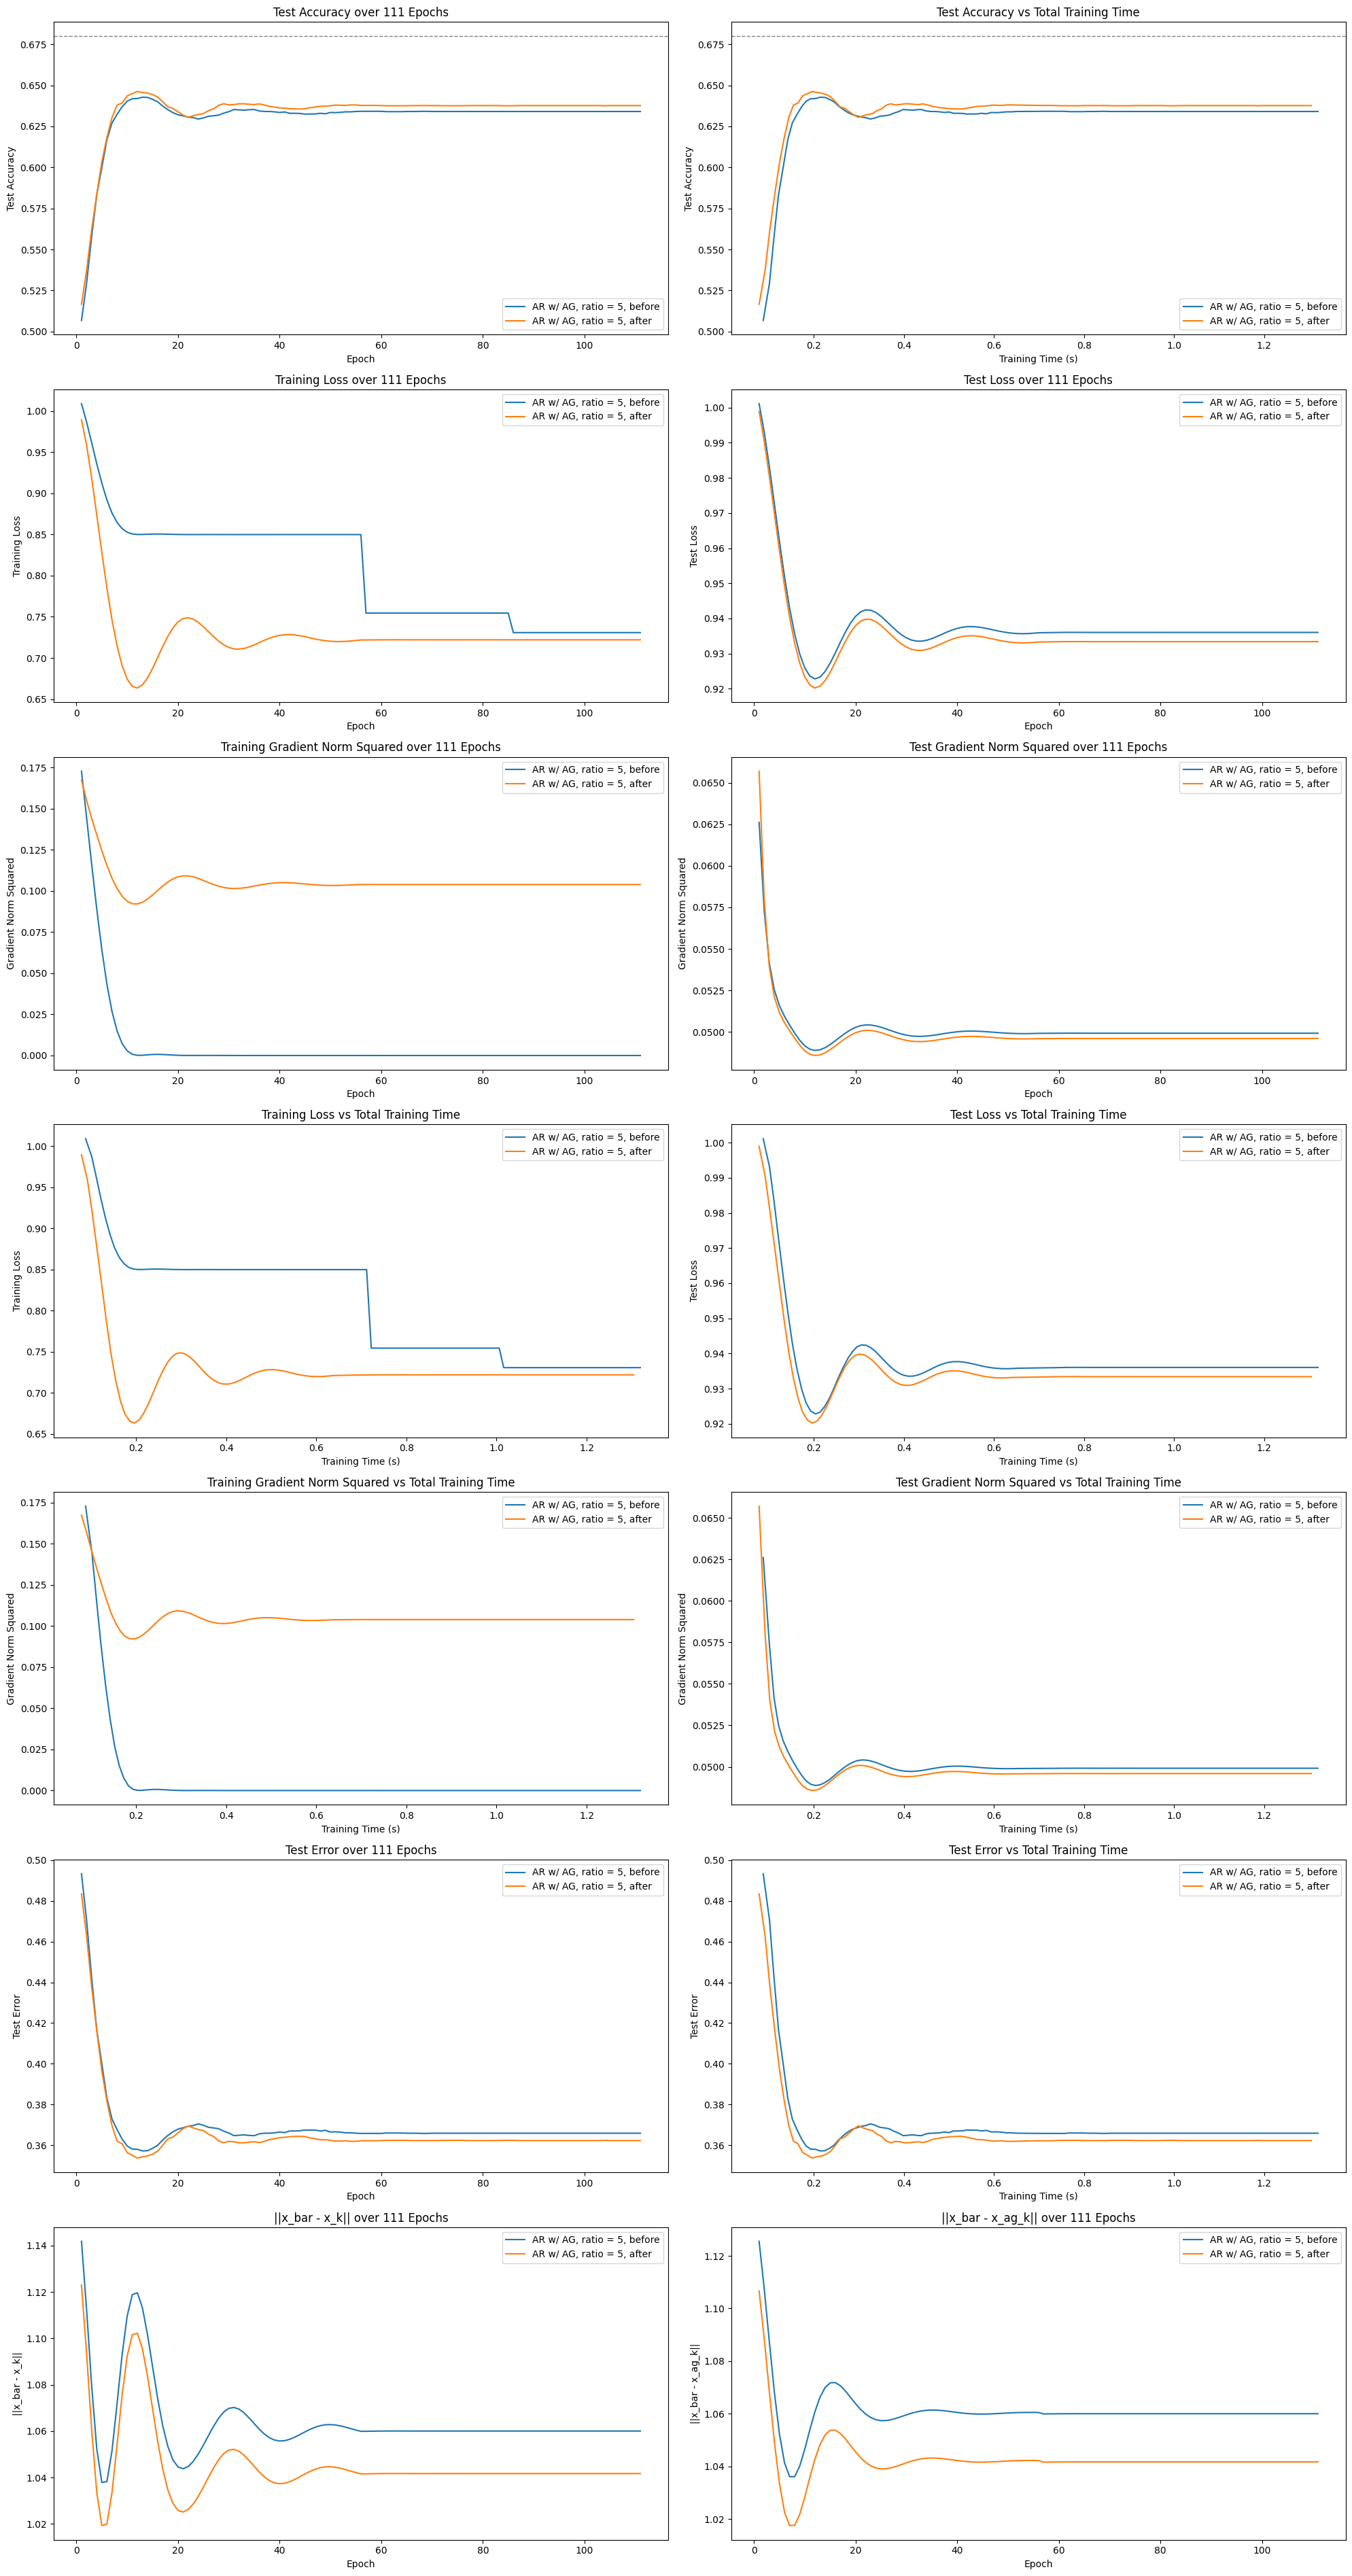

In [14]:
# comparing graphs

before = "generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_5.0/111/2024-12-04-11:15:33/results.csv"
after = "generated/hinge/n_2000_m_1000/AR/no-lr/sigma_ratio_5.0/111/2024-12-13-12:51:49/results.csv"
ag_pf_tuned = "generated/hinge/n_2000_m_1000/AG_pf/lr-0.01/200/no_batching/no_wd/2024-12-16-13:41:04/results.csv"
files = [before, after, ag_pf_tuned]
labels = ["AR w/ AG, ratio = 5, before", "AR w/ AG, ratio = 5, after", "AG"]
plot_results(files, labels)

### AG Parameter-Free Tuned

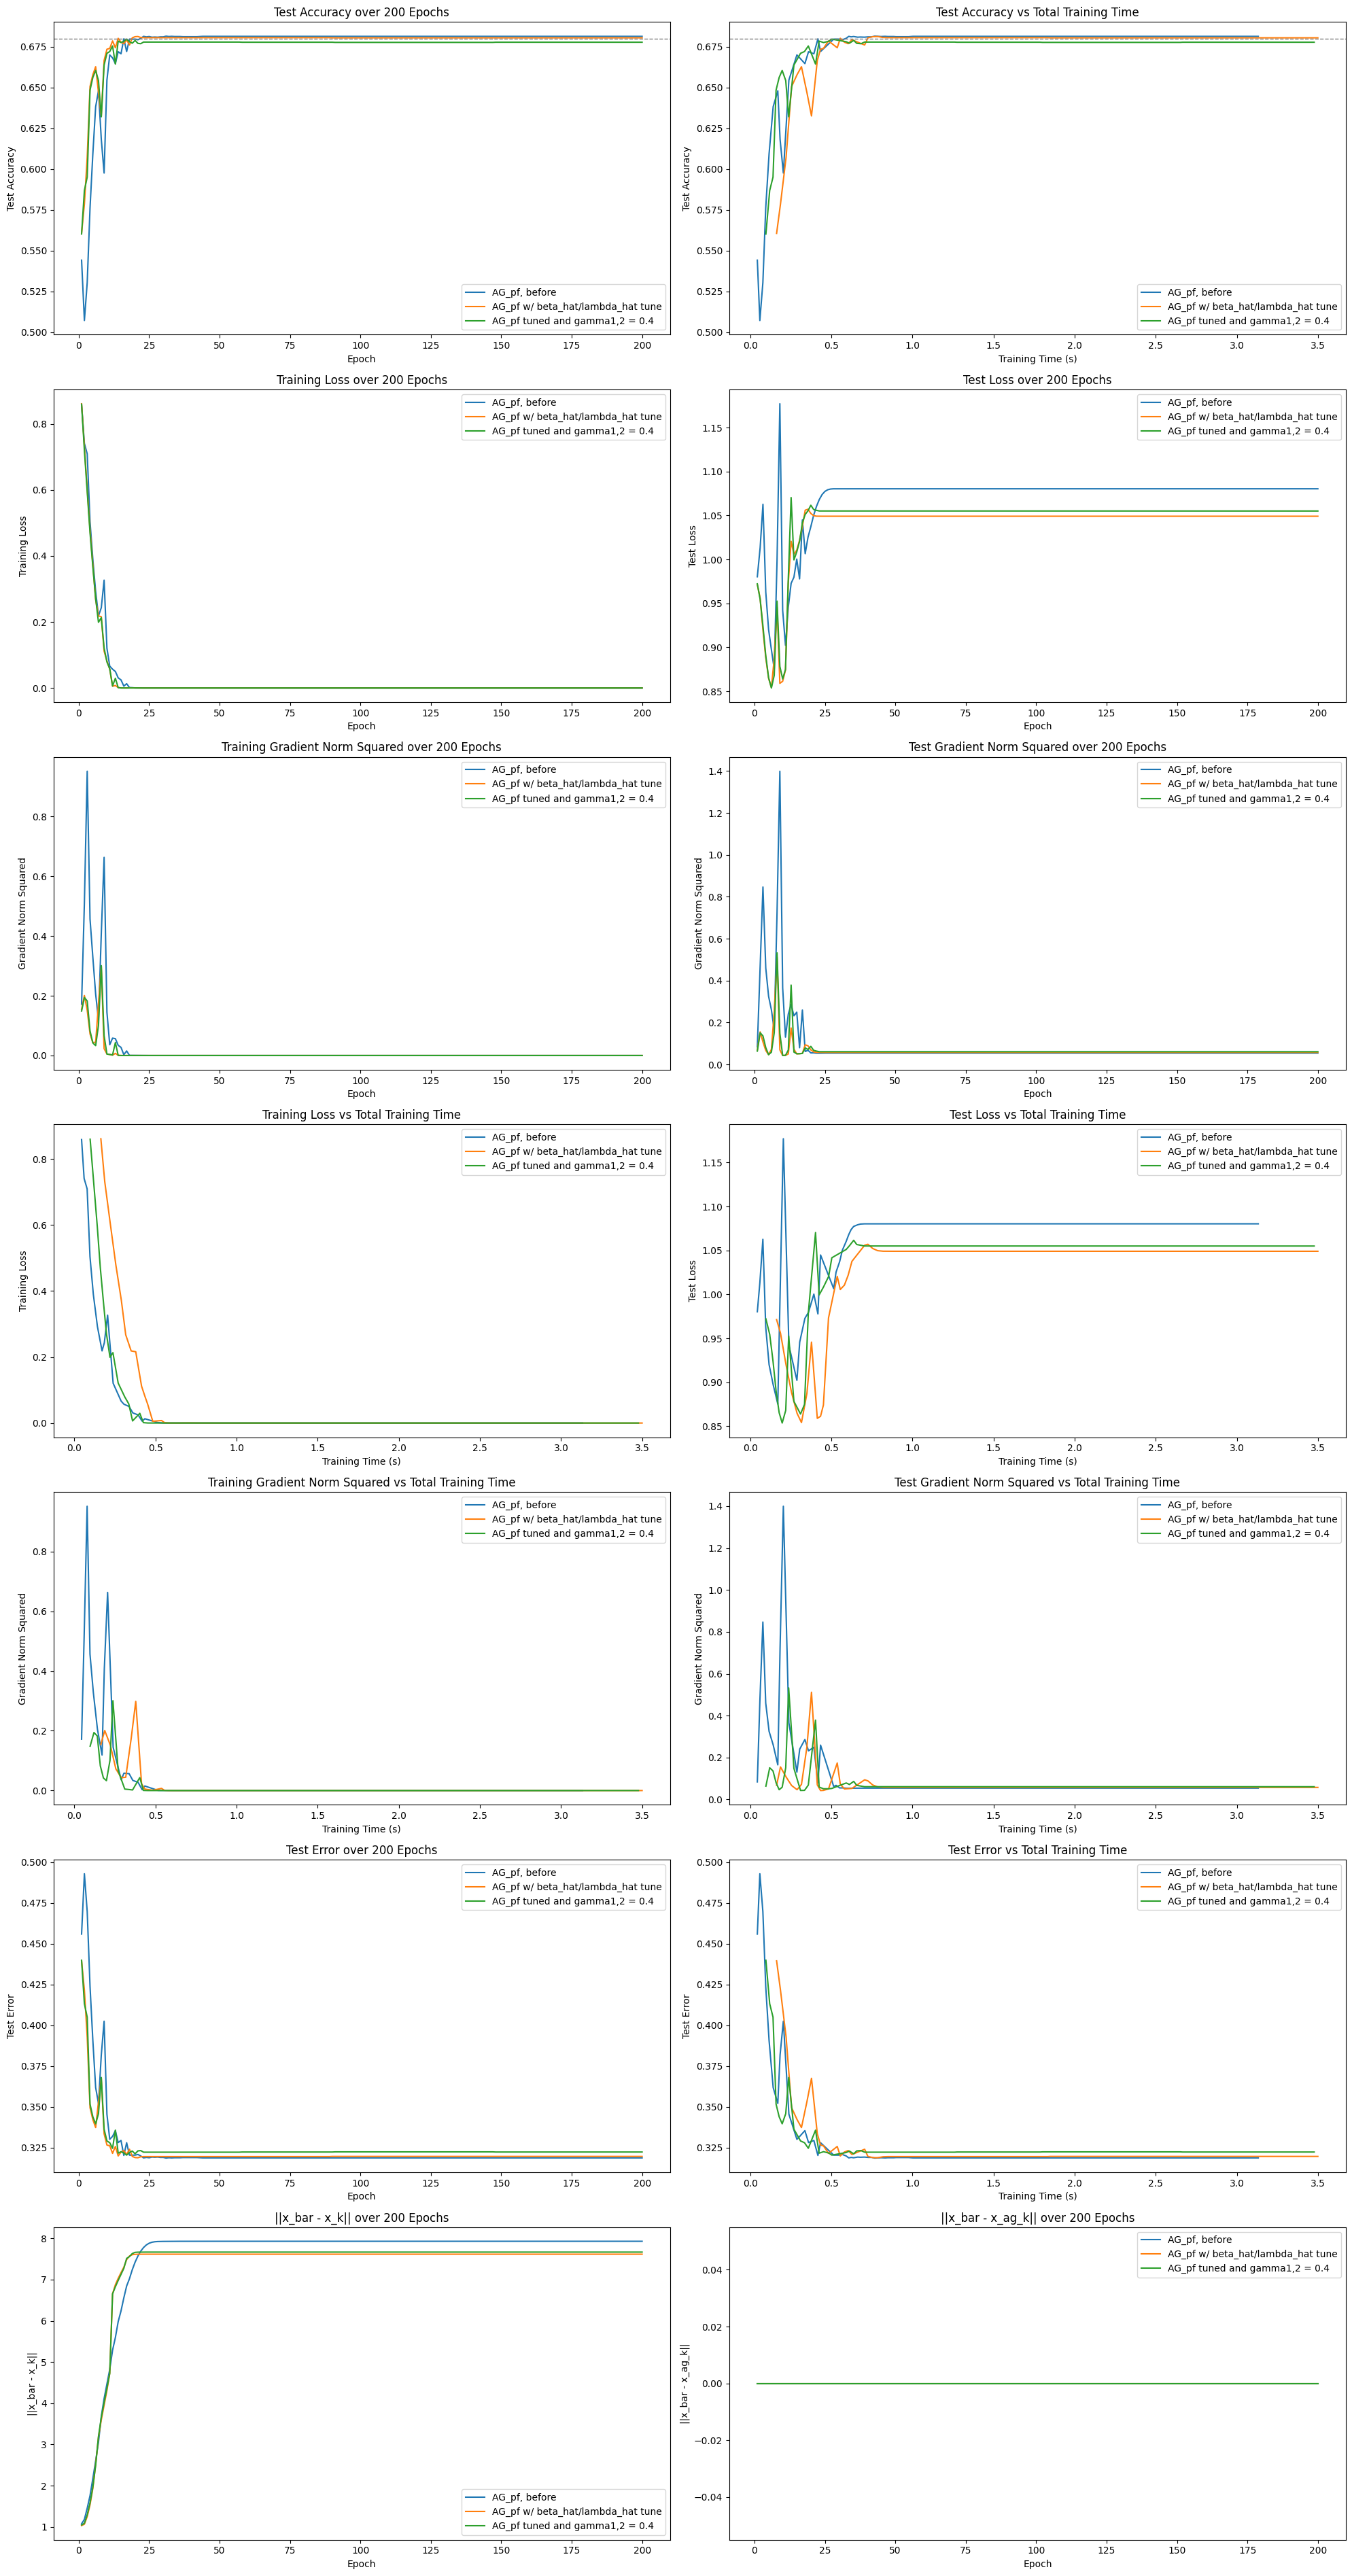

In [13]:
ag_pf = "generated/hinge/n_2000_m_1000/AG_pf/lr-0.01/200/no_batching/no_wd/2024-12-12-14:10:12/results.csv"
ag_pf_tuned = "generated/hinge/n_2000_m_1000/AG_pf/lr-0.01/200/no_batching/no_wd/2024-12-16-13:41:04/results.csv"
ag_pf_new_gammas = "generated/hinge/n_2000_m_1000/AG_pf/lr-0.01/200/no_batching/no_wd/2024-12-16-13:57:21/results.csv"

files = [ag_pf, ag_pf_tuned, ag_pf_new_gammas]
labels = ["AG_pf, before", "AG_pf w/ beta_hat/lambda_hat tune", "AG_pf tuned and gamma1,2 = 0.4"]
plot_results(files, labels)

In [7]:
ag_pf_df = pd.read_csv("generated/hinge/n_2000_m_1000/AG_pf/lr-0.01/200/no_batching/no_wd/2024-12-12-14:10:12/results.csv")
ag_pf_tuned_df = pd.read_csv("generated/hinge/n_2000_m_1000/AG_pf/lr-0.01/200/no_batching/no_wd/2024-12-16-13:41:04/results.csv")
ag_pf_gammas_df = pd.read_csv("generated/hinge/n_2000_m_1000/AG_pf/lr-0.01/200/no_batching/no_wd/2024-12-16-13:57:21/results.csv")

In [10]:
merged_tuned = pd.merge(
    ag_pf_df,
    ag_pf_tuned_df,
    on="Epoch",
    suffixes=("_AG_pf", "_AG_pf_tuned")
)

ag_pf_gammas_df = ag_pf_gammas_df.rename(
    columns={col: f"{col}_AG_pf_gammas_tuned" for col in ag_pf_df.columns if col != "Epoch"}
)

# Perform the second merge
merged_tuned = pd.merge(
    merged_tuned,
    ag_pf_gammas_df,
    on="Epoch"
)

merged_tuned.head()

,Epoch,Training Loss_AG_pf,Total Training Loss_AG_pf,Training Gradient Norm_AG_pf,Training Time (s)_AG_pf,Test Loss_AG_pf,Test Gradient Norm_AG_pf,Test Accuracy_AG_pf,Test Error_AG_pf,x_k Comparison_AG_pf,...,Training Loss_AG_pf_gammas_tuned,Total Training Loss_AG_pf_gammas_tuned,Training Gradient Norm_AG_pf_gammas_tuned,Training Time (s)_AG_pf_gammas_tuned,Test Loss_AG_pf_gammas_tuned,Test Gradient Norm_AG_pf_gammas_tuned,Test Accuracy_AG_pf_gammas_tuned,Test Error_AG_pf_gammas_tuned,x_k Comparison_AG_pf_gammas_tuned,x_ag_k Comparison_AG_pf_gammas_tuned
0,1,0.858524,0.858524,0.414394,0.044052,0.980267,0.289406,0.5441,0.4559,1.075862,...,0.859560,0.859560,0.385418,0.096875,0.972188,0.251815,0.5601,0.4399,1.044951,0.0
1,2,0.740850,0.747984,0.714629,0.015619,1.013239,0.682824,0.5071,0.4929,1.181559,...,0.719674,0.768760,0.440576,0.023503,0.954611,0.388815,0.5868,0.4132,1.088221,0.0
2,3,0.709236,0.657788,0.975365,0.018614,1.062698,0.920178,0.5303,0.4697,1.452568,...,0.595619,0.690811,0.427260,0.020444,0.924152,0.368784,0.5950,0.4050,1.292656,0.0
3,4,0.504018,0.579739,0.675901,0.017562,0.962866,0.678113,0.5761,0.4239,1.757685,...,0.470355,0.617126,0.287514,0.018742,0.890382,0.283261,0.6483,0.3517,1.582134,0.0
4,5,0.389733,0.503051,0.573085,0.020681,0.920219,0.570291,0.6093,0.3907,2.172332,...,0.367072,0.541282,0.205113,0.019113,0.865478,0.215658,0.6561,0.3439,1.966492,0.0


In [12]:
cols = [
    "Epoch",
    "Test Accuracy_AG_pf",
    "Test Accuracy_AG_pf_tuned",
    "Test Accuracy_AG_pf_gammas_tuned",
    "Training Gradient Norm_AG_pf",
    "Training Gradient Norm_AG_pf_tuned",
    "Training Gradient Norm_AG_pf_gammas_tuned",
    "Training Loss_AG_pf",
    "Training Loss_AG_pf_tuned",
    "Training Loss_AG_pf_gammas_tuned",
    "Test Gradient Norm_AG_pf",
    "Test Gradient Norm_AG_pf_tuned",
    "Test Gradient Norm_AG_pf_gammas_tuned",
    "Test Loss_AG_pf",
    "Test Loss_AG_pf_tuned",
    "Test Loss_AG_pf_gammas_tuned"
]

merged_AG_tuned_clean = merged_tuned[cols]
merged_AG_tuned_clean.head(40)

,Epoch,Test Accuracy_AG_pf,Test Accuracy_AG_pf_tuned,Test Accuracy_AG_pf_gammas_tuned,Training Gradient Norm_AG_pf,Training Gradient Norm_AG_pf_tuned,Training Gradient Norm_AG_pf_gammas_tuned,Training Loss_AG_pf,Training Loss_AG_pf_tuned,Training Loss_AG_pf_gammas_tuned,Test Gradient Norm_AG_pf,Test Gradient Norm_AG_pf_tuned,Test Gradient Norm_AG_pf_gammas_tuned,Test Loss_AG_pf,Test Loss_AG_pf_tuned,Test Loss_AG_pf_gammas_tuned
0,1,0.5441,0.5605,0.5601,0.414394,0.392678,0.385418,8.585238e-01,0.861035,0.859560,0.289406,0.259806,0.251815,0.980267,0.971339,0.972188
1,2,0.5071,0.5785,0.5868,0.714629,0.448079,0.440576,7.408500e-01,0.731073,0.719674,0.682824,0.394061,0.388815,1.013239,0.956014,0.954611
2,3,0.5303,0.6072,0.5950,0.975365,0.389528,0.427260,7.092359e-01,0.602363,0.595619,0.920178,0.327609,0.368784,1.062698,0.919557,0.924152
3,4,0.5761,0.6505,0.6483,0.675901,0.269129,0.287514,5.040178e-01,0.479023,0.470355,0.678113,0.258111,0.283261,0.962866,0.888234,0.890382
4,5,0.6093,0.6578,0.6561,0.573085,0.207477,0.205113,3.897327e-01,0.372197,0.367072,0.570291,0.216049,0.215658,0.920219,0.864818,0.865478
5,6,0.6382,0.6627,0.6604,0.453093,0.210664,0.181926,2.921141e-01,0.267147,0.270504,0.510337,0.267864,0.241936,0.897287,0.854280,0.853733
6,7,0.6479,0.6469,0.6542,0.344908,0.416570,0.317576,2.183895e-01,0.218327,0.199049,0.406318,0.500260,0.388892,0.875327,0.887304,0.868134
7,8,0.6182,0.6325,0.6320,0.638676,0.546146,0.548375,2.431387e-01,0.215904,0.213183,0.850462,0.715372,0.729740,0.998412,0.945764,0.952561
8,9,0.5975,0.6665,0.6637,0.814278,0.151990,0.257406,3.266322e-01,0.111739,0.121049,1.182893,0.264097,0.385184,1.177094,0.859031,0.878356
9,10,0.6545,0.6734,0.6709,0.380785,0.070754,0.069604,1.204900e-01,0.081919,0.079007,0.604510,0.206271,0.207315,0.942119,0.861406,0.863982
